## Mini-Projeto 4 - Inteligência Artificial na Agricultura 

**ATENÇÃO**

Este Mini-Projeto é um bônus com nível intermediário/avançado e o que apresentaremos aqui é apenas uma demonstração. Os conceitos necessários para executar este Mini-Projeto são estudados em detalhes na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> e <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação Inteligência Artificial Aplicada à Medicina</a> aqui na DSA.

![title](imagens/mini-projeto4.png)

## Definição do Problema

Acesse o manual em pdf no Capítulo 12 do curso.

## Fonte de Dados

Acesse o manual em pdf no Capítulo 12 do curso.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.12


In [2]:
# Instala o TensorFlow
#!pip install -q tensorflow==2.5

In [3]:
# Imports
import sklearn
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation
from tensorflow.keras.layers.experimental.preprocessing import RandomZoom
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision
from tensorflow.keras.metrics import Recall

In [4]:
# Seed para reprodutibilidade
tf.random.set_seed(4)

## Carregando os Dados (Imagens)

In [2]:
# Diretório atual
diretorio_atual = Path.cwd()
print(diretorio_atual)

NameError: name 'Path' is not defined

In [6]:
# Caminho para os dados de treino
caminho_dados_treino = Path("fruits-360/Training")

In [7]:
# Caminho para os dados de teste
caminho_dados_teste = Path("fruits-360/Test")

In [8]:
# Listando o conteúdo da pasta
imagens_treino = list(caminho_dados_treino.glob("*/*"))

In [9]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

[PosixPath('fruits-360/Training/Orange/r_107_100.jpg'),
 PosixPath('fruits-360/Training/Orange/r_294_100.jpg'),
 PosixPath('fruits-360/Training/Orange/307_100.jpg'),
 PosixPath('fruits-360/Training/Orange/165_100.jpg'),
 PosixPath('fruits-360/Training/Orange/155_100.jpg'),
 PosixPath('fruits-360/Training/Orange/245_100.jpg'),
 PosixPath('fruits-360/Training/Orange/r_200_100.jpg'),
 PosixPath('fruits-360/Training/Orange/142_100.jpg'),
 PosixPath('fruits-360/Training/Orange/17_100.jpg'),
 PosixPath('fruits-360/Training/Orange/280_100.jpg'),
 PosixPath('fruits-360/Training/Orange/r_110_100.jpg')]

In [10]:
# Expressão lambda que extrai apenas o valor com o caminho de cada imagem
imagens_treino = list(map(lambda x: str(x), imagens_treino))

In [11]:
# Visualiza uma amostra da lista
imagens_treino[925:936]

['fruits-360/Training/Orange/r_107_100.jpg',
 'fruits-360/Training/Orange/r_294_100.jpg',
 'fruits-360/Training/Orange/307_100.jpg',
 'fruits-360/Training/Orange/165_100.jpg',
 'fruits-360/Training/Orange/155_100.jpg',
 'fruits-360/Training/Orange/245_100.jpg',
 'fruits-360/Training/Orange/r_200_100.jpg',
 'fruits-360/Training/Orange/142_100.jpg',
 'fruits-360/Training/Orange/17_100.jpg',
 'fruits-360/Training/Orange/280_100.jpg',
 'fruits-360/Training/Orange/r_110_100.jpg']

In [12]:
# Total de imagens de treino
len(imagens_treino)

67692

## Pré-Processamento dos Dados

In [13]:
# Função que obtém o label de cada imagem
def extrai_label(caminho_imagem):
    return caminho_imagem.split("/")[-2]

In [14]:
# Aplica a função
imagens_treino_labels = list(map(lambda x: extrai_label(x), imagens_treino))

In [15]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

['Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange']

> Label encoding (convertendo string para valor numérico)

In [16]:
# Cria o objeto
encoder = LabelEncoder()

In [17]:
# Aplica o fit_transform
imagens_treino_labels = encoder.fit_transform(imagens_treino_labels)

In [18]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

array([77, 77, 77, 77, 77, 77])

In [19]:
# Aplicamos One-Hot-Encoding nos labels
imagens_treino_labels = tf.keras.utils.to_categorical(imagens_treino_labels)

In [20]:
# Visualiza uma amostra
imagens_treino_labels[840:846]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [21]:
# Dividimos os dados de treino em duas amostras, treino e validação
X_treino, X_valid, y_treino, y_valid = train_test_split(imagens_treino, imagens_treino_labels)

In [22]:
X_treino[15:18]

['fruits-360/Training/Pepper Red/r_39_100.jpg',
 'fruits-360/Training/Banana Lady Finger/r_196_100.jpg',
 'fruits-360/Training/Lemon/163_100.jpg']

In [23]:
y_treino[15:18]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.,

## Dataset Augmentation

In [24]:
# Redimensionamento de todas as imagens para 224 x 224
img_size = 224
resize = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Resizing(img_size, img_size)])

In [25]:
# Cria o objeto para dataset augmentation
data_augmentation = tf.keras.Sequential([RandomFlip("horizontal"),
                                         RandomRotation(0.2),
                                         RandomZoom(height_factor = (-0.3,-0.2)) ])

## Preparando os Dados

In [26]:
# Hiperparâmnetros
batch_size = 32
autotune = tf.data.experimental.AUTOTUNE

In [27]:
# Função para carregar e transformar as imagens
def carrega_transforma(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    return image, label

In [28]:
# Função para preparar os dados noo formato do TensorFlow
def prepara_dataset(path, labels, train = True):

    # Prepara os dados
    image_paths = tf.convert_to_tensor(path)
    labels = tf.convert_to_tensor(labels)
    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)
    dataset = tf.data.Dataset.zip((image_dataset, label_dataset))
    dataset = dataset.map(lambda image, label: carrega_transforma(image, label)) 
    dataset = dataset.map(lambda image, label: (resize(image), label), num_parallel_calls = autotune)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(batch_size)

    # Se train = True aplica dataset augmentation
    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label), num_parallel_calls = autotune)
  
    # Se train = False repete sobre o dataset e retorna
    dataset = dataset.repeat()

    return dataset

In [29]:
# Cria o dataset de treino
dataset_treino = prepara_dataset(X_treino, y_treino)

In [30]:
# Shape
imagem, label = next(iter(dataset_treino))
print(imagem.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Apple Golden 1


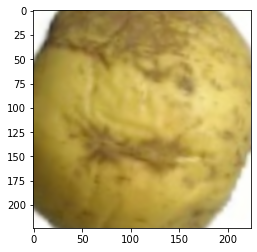

In [31]:
# Vamos visualizar uma imagem e um label
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224,224,3))

In [32]:
# Cria o dataset de validação
dataset_valid = prepara_dataset(X_valid, y_valid, train = False)

In [33]:
# Shape
imagem, label = next(iter(dataset_valid))
print(imagem.shape) 
print(label.shape)

(32, 224, 224, 3)
(32, 131)


## Construção do Modelo

In [34]:
# Carregando um modelo pré-treinado
modelo_pre = EfficientNetB3(input_shape = (224,224,3), include_top = False)

In [35]:
# Adicionando nossas próprias camadas ao modelo_pre
modelo = tf.keras.Sequential([modelo_pre,
                              tf.keras.layers.GlobalAveragePooling2D(),
                              tf.keras.layers.Dense(131, activation = 'softmax')])

In [36]:
# Sumário do modelo
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               201347    
Total params: 10,984,882
Trainable params: 10,897,579
Non-trainable params: 87,303
_________________________________________________________________


In [37]:
# Hiperparâmetros
lr = 0.001
beta1 = 0.9
beta2 = 0.999
ep = 1e-07

In [38]:
# Compilação do modelo
modelo.compile(optimizer = Adam(learning_rate = lr, 
                                beta_1 = beta1, 
                                beta_2 = beta2, 
                                epsilon = ep),
               loss = 'categorical_crossentropy',
               metrics = ['accuracy', Precision(name = 'precision'), Recall(name = 'recall')])

> Vamos treinar o modelo por apenas uma época e verificar as métricas.

**Nota**: Se você treinar o modelo em um computador sem GPU o tempo de treinamento será bastante alto, provavelmente de muitas horas. Pratique a paciência e aguarde.

In [40]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(X_treino)//batch_size,
                     epochs = 1,
                     validation_data = dataset_valid,
                     validation_steps = len(y_treino)//batch_size)

1586/1586 [==============================] - 567s 358ms/step - loss: 0.2437 - accuracy: 0.9369 - precision: 0.9676 - recall: 0.9173 - val_loss: 2.8520 - val_accuracy: 0.5486 - val_precision: 0.5955 - val_recall: 0.5219
CPU times: user 22min 39s, sys: 1min 46s, total: 24min 26s
Wall time: 9min 39s


> Vamos treinar o modelo por mais 6 épocas a fim de melhorar a performance e aplicar algumas técnicas para evitar overfitting.

In [41]:
# Não precisamos mais do modelo_pre
modelo.layers[0].trainable = False

In [42]:
# Checkpoint
checkpoint = tf.keras.callbacks.ModelCheckpoint("modelo/melhor_modelo.h5", 
                                                verbose = 1, 
                                                save_best = True, 
                                                save_weights_only = True)

In [43]:
# Early stop
early_stop = tf.keras.callbacks.EarlyStopping(patience = 4) 

In [44]:
# Sumário
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 131)               201347    
Total params: 10,984,882
Trainable params: 201,347
Non-trainable params: 10,783,535
_________________________________________________________________


In [45]:
%%time
history = modelo.fit(dataset_treino,
                     steps_per_epoch = len(X_treino)//batch_size,
                     epochs = 6,
                     validation_data = dataset_valid,
                     validation_steps = len(y_treino)//batch_size,
                     callbacks = [checkpoint, early_stop])

Epoch 1/6
1586/1586 [==============================] - ETA: 0s - loss: 0.0602 - accuracy: 0.9839 - precision: 0.9858 - recall: 0.9819
Epoch 00001: saving model to modelo/melhor_modelo.h5
1586/1586 [==============================] - 566s 357ms/step - loss: 0.0602 - accuracy: 0.9839 - precision: 0.9858 - recall: 0.9819 - val_loss: 1.9028 - val_accuracy: 0.6720 - val_precision: 0.6956 - val_recall: 0.6538
Epoch 2/6
1586/1586 [==============================] - ETA: 0s - loss: 0.0447 - accuracy: 0.9873 - precision: 0.9887 - recall: 0.9861
Epoch 00002: saving model to modelo/melhor_modelo.h5
1586/1586 [==============================] - 575s 363ms/step - loss: 0.0447 - accuracy: 0.9873 - precision: 0.9887 - recall: 0.9861 - val_loss: 1.1099 - val_accuracy: 0.6940 - val_precision: 0.7524 - val_recall: 0.6507
Epoch 3/6
1586/1586 [==============================] - ETA: 0s - loss: 0.0338 - accuracy: 0.9902 - precision: 0.9914 - recall: 0.9896
Epoch 00003: saving model to modelo/melhor_modelo.h5
1

## Avaliação do Modelo

In [46]:
# Para carregar os pesos, precisamos descongelar as camadas
modelo.layers[0].trainable = True

In [47]:
# Carrega os pesos do ponto de verificação e reavalie
modelo.load_weights("modelo/melhor_modelo.h5")

> Carregamos os dados de teste.

In [48]:
# Carregando e preparando os dados de teste
camninho_imagens_teste = list(caminho_dados_teste.glob("*/*"))
imagens_teste = list(map(lambda x: str(x), camninho_imagens_teste))
imagens_teste_labels = list(map(lambda x: extrai_label(x), imagens_teste))
imagens_teste_labels = encoder.fit_transform(imagens_teste_labels)
imagens_teste_labels = tf.keras.utils.to_categorical(imagens_teste_labels)
test_image_paths = tf.convert_to_tensor(imagens_teste)
test_image_labels = tf.convert_to_tensor(imagens_teste_labels)

In [49]:
# Função para decode das imagens
def decode_imagens(image, label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    return image, label

In [50]:
# Cria o dataset de teste
dataset_teste = (tf.data.Dataset
                 .from_tensor_slices((imagens_teste, imagens_teste_labels))
                 .map(decode_imagens)
                 .batch(batch_size))

In [51]:
# Shape
imagem, label = next(iter(dataset_teste))
print(imagem.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Cocos


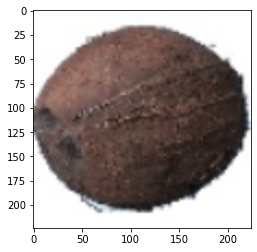

In [52]:
# Visualiza uma imagem de teste
print(encoder.inverse_transform(np.argmax(label, axis = 1))[0])
plt.imshow((imagem[0].numpy()/255).reshape(224,224,3))

In [53]:
# Avalia o modelo
loss, acc, prec, rec = modelo.evaluate(dataset_teste)

709/709 [==============================] - 33s 47ms/step - loss: 1.1287 - accuracy: 0.7616 - precision: 0.7857 - recall: 0.7499


In [54]:
print("Acurácia: ", acc)
print("Precision: ", prec)
print("Recall: ", rec)

Acurácia:  0.7615920305252075
Precision:  0.7857208847999573
Recall:  0.7499118447303772


## Previsões com o Modelo Treinado

In [55]:
# Função para carregar uma nova imagem
def carrega_nova_imagem(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image, channels = 3)
    image = tf.image.resize(image, [224,224], method = "bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image, 0) 
    return image

In [56]:
# Função para fazer previsões
def faz_previsao(image_path, model, enc):
    image = carrega_nova_imagem(image_path)
    prediction = model.predict(image)
    pred = np.argmax(prediction, axis = 1) 
    return enc.inverse_transform(pred)[0] 

'Pineapple'

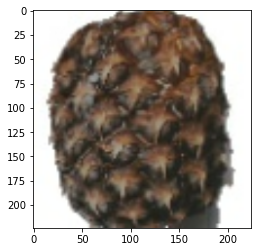

In [57]:
# Previsão
faz_previsao("imagens/imagem1.jpg", modelo, encoder)

'Cauliflower'

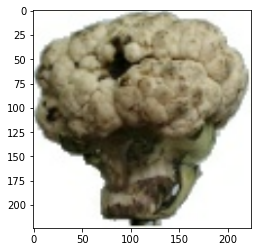

In [58]:
# Previsão
faz_previsao("imagens/imagem2.jpg", modelo, encoder)

'Pepper Yellow'

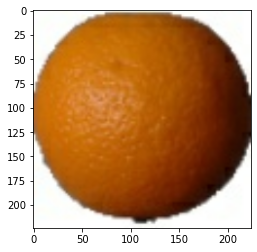

In [59]:
# Previsão
faz_previsao("imagens/imagem3.jpg", modelo, encoder)

'Watermelon'

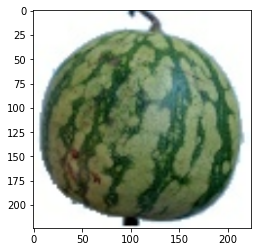

In [60]:
# Previsão
faz_previsao("imagens/imagem4.jpg", modelo, encoder)

'Raspberry'

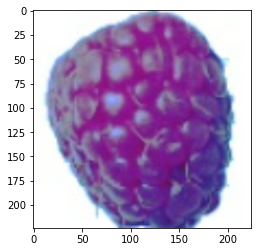

In [61]:
# Previsão
faz_previsao("imagens/imagem5.jpg", modelo, encoder)

# Fim